

```
In this notebook:

1) We will first explore the dataset provided
2) We will create models to predict whether a client will subscribe to a term deposit.

```



Let's start by importing the libraries that we will be using.

In [ ]:
import pandas as pd               # For reading and doing operations related to dataframe
import matplotlib.pyplot as plt   # For data visualization
import numpy as np                # For any mathematical operations
import seaborn as sns             # For data visualization

import warnings                   # To ignore any warnings
warnings.filterwarnings("ignore")

Loading the dataset (Both Training and Testing dataset)

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Let's check how the dataset looks like by checking it through first 5 top lines

In [ ]:
#printing first five rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
#printing first five rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Let's check the features present in our data and then we will look at their data types.

In [ ]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [ ]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [ ]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

It can be infered that subscribed is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [ ]:
train.shape

(31647, 18)

In [ ]:
test.shape

(13564, 17)

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

**UNIVARIATE ANALYSIS**

Now Let's look at the distribution of our target variable, i.e. subscribed.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

For other continous variables, we have to look for some statstical measures, histogram and boxplot

**a) For Continous Variables**

In [ ]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


We are taking three different independent continous variables for analaysis.

<Axes: ylabel='Frequency'>

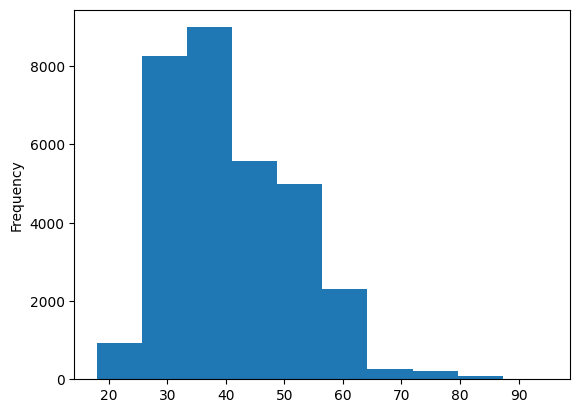

In [ ]:
train['age'].plot.hist()

<Axes: ylabel='Frequency'>

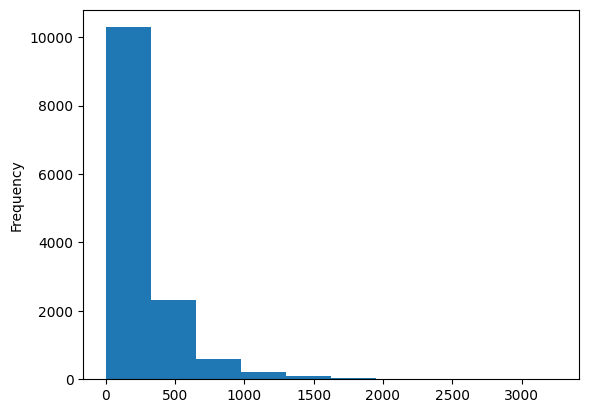

In [ ]:
test['duration'].plot.hist()

<Axes: >

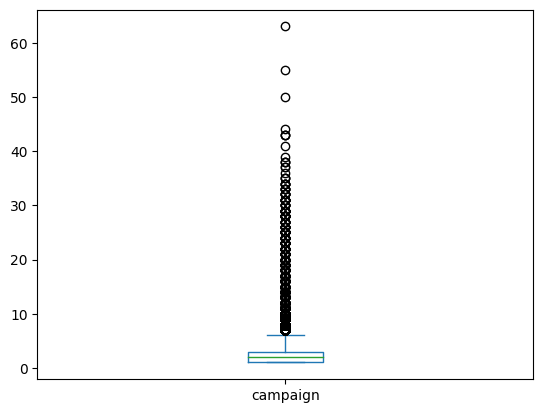

In [ ]:
train['campaign'].plot.box()

**b) For Categorical Variables**

In [ ]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions instead of number
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

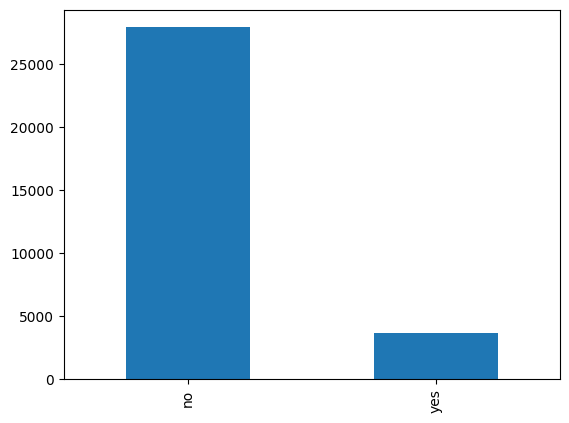

In [ ]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

<Axes: xlabel='age', ylabel='Density'>

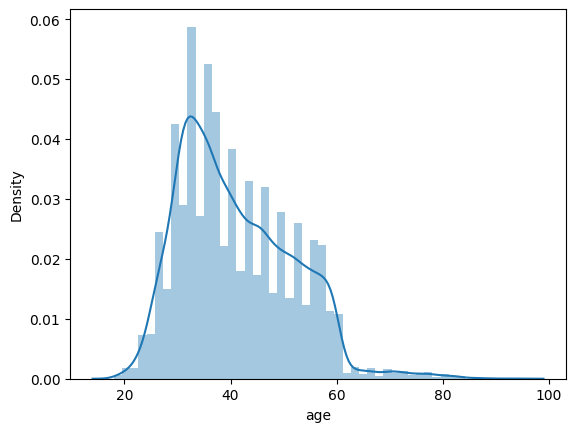

In [ ]:
sns.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<Axes: >

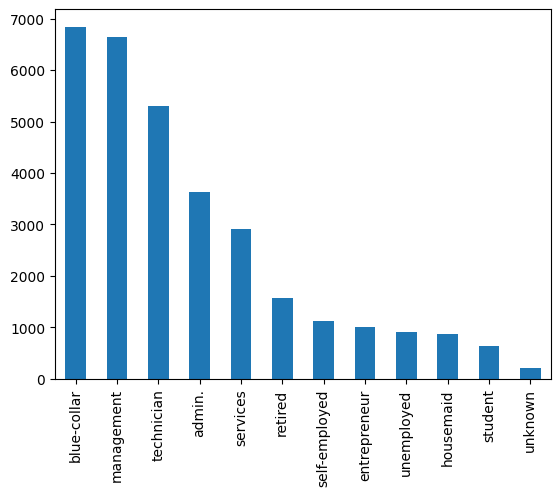

In [ ]:
train['job'].value_counts().plot.bar()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<Axes: >

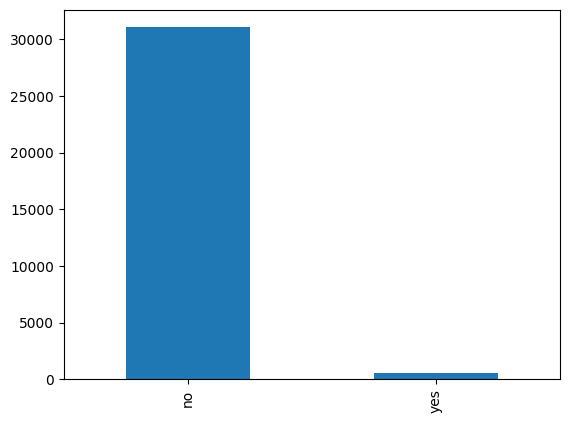

In [ ]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history.

Now we will explore these variables against the target variable using bivariate analysis.

**BIVARIATE ANALYSIS**

We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables.

Let's start with job and subscribed variable.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

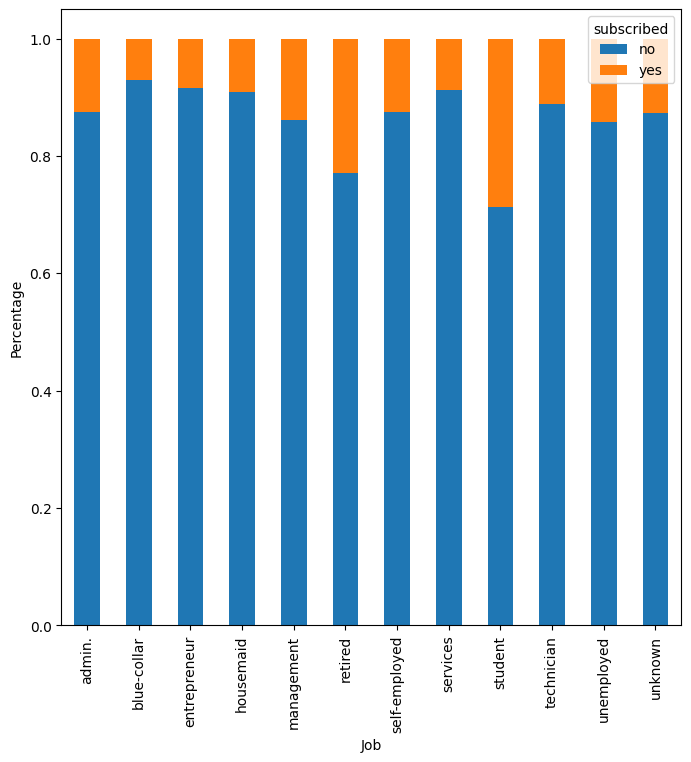

In [ ]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

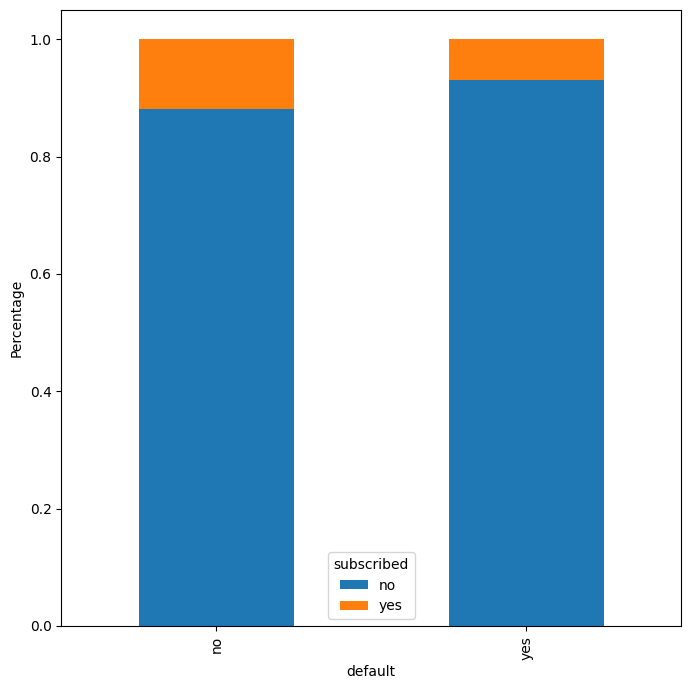

In [ ]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [ ]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [ ]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [ ]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

**MODEL BUILDING**

In [ ]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [ ]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model.

We will split the train data into training and testing set so that we will be able to validate the results of our model on the testing set. We will keep 20% data as testing set and rest as the training set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state = 12)

Now our data is ready. Its time to build our model and check its performance.

Logistic regression is used for classification problems and as it is a classification problem.

Let's first build a Logistic Regression model.

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = clf.predict(x_test)

Now we will evaluate how accurate our predictions are.
As the evaluation metric for this problem is accuracy, let's calculate the accuracy on testing set.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, pred)

0.8908372827804107

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary.

#**Decision Tree**

What if our data have non linearity? We need a model that can capture this non linearity.

Let's try decision tree algorithm now to check if we get better accuracy with that.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# making prediction on the testing set
pred = clf.predict(x_test)

In [ ]:
# calculating the accuracy score
accuracy_score(y_test, pred)

0.9042654028436019

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [ ]:
test = pd.get_dummies(test)

In [ ]:
test_prediction = clf.predict(test)
test_prediction

array([0, 1, 0, ..., 0, 1, 0])

# Having acess to values in a csv file

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [ ]:
submission = pd.DataFrame()

In [ ]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [ ]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [ ]:
submission.to_csv('submission.csv', header=True, index=False)

Now you have the submission file with you.
Open the submission.csv file to get the results.
